In [ ]:
import pandas as pd
import string
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix , classification_report
from joblib import dump,load
import requests,json
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import numpy as np
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
sheet_url='https://docs.google.com/spreadsheets/d/1SdVtOQykaROvx9n9tezpGg2BXL2zixJL/edit#gid=109307861'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
 
df2 = pd.read_csv(csv_export_url, header=None)
df2.head()

,0
0,"db.mycol.find({$and:[{""by"":""tutorials point""},..."
1,"db.Document.find({ ""type"": { ""$gte"": """" } })::::1"
2,"db.books.insert({ title: 'The Hobbit', author:..."
3,db.books.find({ title: 'The Hobbit' })::::0
4,"db.logins.find({ username: 'tolkien', password..."


In [ ]:
df2.drop_duplicates()

,0
0,"db.mycol.find({$and:[{""by"":""tutorials point""},..."
1,"db.Document.find({ ""type"": { ""$gte"": """" } })::::1"
2,"db.books.insert({ title: 'The Hobbit', author:..."
3,db.books.find({ title: 'The Hobbit' })::::0
4,"db.logins.find({ username: 'tolkien', password..."
...,...
1273,db.posts.mapReduce( function() { emit(this.use...
1274,db.posts.mapReduce( function() { emit(this.use...
1275,"""db.createCollection(""""mycol"""", { capped : tru..."
1276,"db.collection.bulkWrite( [{ replaceOne:{""filte..."


In [ ]:
vulnerability=[]
for i in range(1254):
  query = df2.loc[i]
  vulnerability.append(query.values[0][-1])

In [ ]:
vulnerability.count("1"),vulnerability.count("0")

(243, 1011)

In [ ]:
sheet_url='https://docs.google.com/spreadsheets/d/1Y8k582i3d05SfLFJmaSzKLO2T18NfGp8Exm4qG2UR9g/edit#gid=1029040470'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
 
df = pd.read_csv(csv_export_url)
df.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,ClassLabel
0,0,0,0,1,1,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
sheet_url='https://docs.google.com/spreadsheets/d/1il54YsQNfGxLOeMvG94PyymbKZ-JeddP/edit#gid=1921110563'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
 
pl = pd.read_csv(csv_export_url, header= None)


# Feature Extraction

In [ ]:
class NoSQL_Feature_Extraction:
  def __init__(self, payloadurl):
    self.payloadurl = payloadurl
  
  def extractFeature(self, query, vul):
    import pandas as pd
    import string

    sheet_url='https://docs.google.com/spreadsheets/d/1il54YsQNfGxLOeMvG94PyymbKZ-JeddP/edit#gid=1921110563'
    csv_export_url = self.payloadurl.replace('/edit#gid=', '/export?format=csv&gid=')
    pl = pd.read_csv(csv_export_url, header= None)

    tempQuery = query.translate({ord(c): None for c in string.whitespace}) #removing all whitespace
    # Feature 1
    # Detect if query has condition

    def containsCondition(query):
      condition = ["find(", "$selector", "find.sort("]
      condition2 = ["$eq", "$gt", "$gte" , "$ne", "$lt", "$lte", "$in", "$nin"]
      for i in condition:
        if i in query:
          return 1
      for i in condition2:
        if i in query:
          return 0
      return 0  

    # Feature 2
    # Detects piggy back query

    def isNewQuery(query):
      if ";db.(" in query:
        return 1
      else:
        return 0

    # Feature 3
    # Detect if query contains empty string

    def containsEmptyString(query):
      if "\"\"" in query or "''" in query:
        return 1
      else:
        return 0  

    # Feature 4
    # Detect if query has $ne

    def containsNotEqual(query):
      if "$ne" in query:
        return 1
      else:
        return 0

    # Feature 5
    # Detect if query contains payload

    def containsPayload(tempQuery):
      for i in range(31):
        temp = pl.loc[i].values[0]
        temp = temp.translate({ord(c): None for c in string.whitespace})
        if temp in tempQuery:
          return 1 
      return 0

    # Feature 6
    # Detect if query contains return

    def containsReturn(query):
      returnlist = [";return", "return 1", "return true" , "return(true)"]
      for i in returnlist:
        if i in query:
          return 1
      return 0       

    # Feature 7
    # Detect if query is always true

    def containsRegexTrue(tempQuery):
      if "/.*/" in tempQuery or "/./" in tempQuery or "/." in tempQuery:
        return 1
      return 0


    # Feature 8
    # Detect if query contains evaluation operators

    def evalQueryOperations(tempQuery):
      evalop = ["$mod", "$regex", "$text" , "$where"]
      for i in evalop:
        if i in tempQuery:
          return 1
      return 0  

    # Feature 9
    # Detect if query contains logical operators

    def containsLogicalOp(query):
      logop = ["$or", "$and", "$not" , "$nor"]
      for i in logop:
        if i in query:
          return 1
      return 0


    # Feature 10
    # Detect if query contains element operation

    def elementQueryOperations(tempQuery):
      if "$exists" in tempQuery or "$type" in tempQuery:
        return 1
      return 0



    #Feature 11
    # Detect if query alters the table 

    def containsFunction(query):
      func = ["createTable()", "showTable()", "drop(" , "dropDatabase("]
      for i in func:
        if i in query:
          return 1
      return 0   


    #Feature 12
    # Detect if query has operations

    def isUpdateQuery(query):
      opr = ["update", "save(", "remove(" , "limit"]
      for i in opr:
        if i in query:
          return 1
      return 0         

    #Feature 13
    # Detect if query contains empty content

    def containsEmptyArray(query):
      empt = ["{}","[]","null","NULL"]
      for i in empt:
        if i in query:
          return 1
      return 0 



    #Feature 14
    # Detect if query has infinite loop

    def isWhileTrue(query):
      if "while(true)" in query:
        return 1
      else:
        return 0


    #Feature 15
    # Detect query's end

    def containsEndQuery(tempQuery):
      if ";}//" in tempQuery:
        return 1
      else:
        return 0  

  
    features = []
    features.append(containsCondition(query))
    features.append(isNewQuery(query))
    features.append(containsEmptyString(query))
    features.append(containsNotEqual(query))
    features.append(containsPayload(tempQuery))
    features.append(containsReturn(query))
    features.append(containsRegexTrue(tempQuery))
    features.append(evalQueryOperations(tempQuery))
    features.append(containsLogicalOp(query))
    features.append(elementQueryOperations(tempQuery))
    features.append(containsFunction(tempQuery))
    features.append(isUpdateQuery(tempQuery))
    features.append(containsEmptyArray(tempQuery))
    features.append(isWhileTrue(tempQuery))
    features.append(containsEndQuery(tempQuery))
    features.append(int(vul))
    return features 

In [ ]:
tmp = NoSQL_Feature_Extraction('https://docs.google.com/spreadsheets/d/1il54YsQNfGxLOeMvG94PyymbKZ-JeddP/edit#gid=1921110563')
feature_df = pd.DataFrame([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], columns=['containsCondition', 'isNewQuery', 'containsEmptyString', 'containsNotEqual', 
                                                                        'containsPayload', 'containsReturn', 'containsRegexTrue', 'evalQueryOperations', 
                                                                        'containsLogicalOp', 'elementQueryOperations', 'containsFunction', 'isUpdateQuery', 
                                                                        'containsEmptyArray', 'isWhileTrue', 'containsEndQuery', 'Label'])

for i in range(1254):
  query = df2.loc[i]
  vulnerability = query.values[0][-1]
  query = query.values[0][:-5]

  feature_list = tmp.extractFeature(query,vulnerability)
  df_length = len(feature_df)
  feature_df.loc[df_length] = feature_list

KeyboardInterrupt: ignored

In [ ]:
feature_df = pd.read_csv('/content/nosql_features.csv')

In [ ]:
feature_df

,containsCondition,isNewQuery,containsEmptyString,containsPayload,containsReturn,containsRegexTrue,evalQueryOperations,containsLogicalOp,elementQueryOperations,containsFunction,isUpdateQuery,containsEmptyArray,isWhileTrue,containsEndQuery,Label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
feature_df.drop(feature_df.columns[feature_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
# feature_df.to_csv("nosql_features.csv")

In [ ]:
feature_df.sum(axis = 0, skipna = True)

containsCondition         780
isNewQuery                 64
containsEmptyString         9
containsPayload            71
containsReturn             23
containsRegexTrue          22
evalQueryOperations       139
containsLogicalOp         217
elementQueryOperations     36
containsFunction            7
isUpdateQuery             192
containsEmptyArray        125
isWhileTrue                 2
containsEndQuery            0
Label                     264
dtype: int64

In [ ]:
X = feature_df
Y = X['Label']
X = X.drop('Label',axis=1)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# SEED = 42
# cross_valid_scores={}
# cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = SEED )

# scaler = StandardScaler()
# scaler.fit(X)
# scaled_data = scaler.transform(X)

# y=Y
# parameters = {
#     "C": [0.001, 0.01, 0.1, 1.],
#     "kernel": ["linear", "poly", "rbf", "sigmoid"],
#     "gamma": ["scale", "auto"],
# }

# model_svc = SVC(
#     random_state=SEED,
#     class_weight="balanced",
#     probability=True,
# )

# model_svc = GridSearchCV(
#     model_svc, 
#     parameters, 
#     cv=cv_split,
#     scoring='accuracy',
# )

# model_svc.fit(X ,y.values)

# print(f'Best parameters {model_svc.best_params_}')
# print(
#     f'Mean cross-validated accuracy score of the best_estimator: ' + 
#     f'{model_svc.best_score_:.3f}'
# )



# cross_valid_scores['svc'] = model_svc.best_score_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80e63856d0>,
      dtype=object)

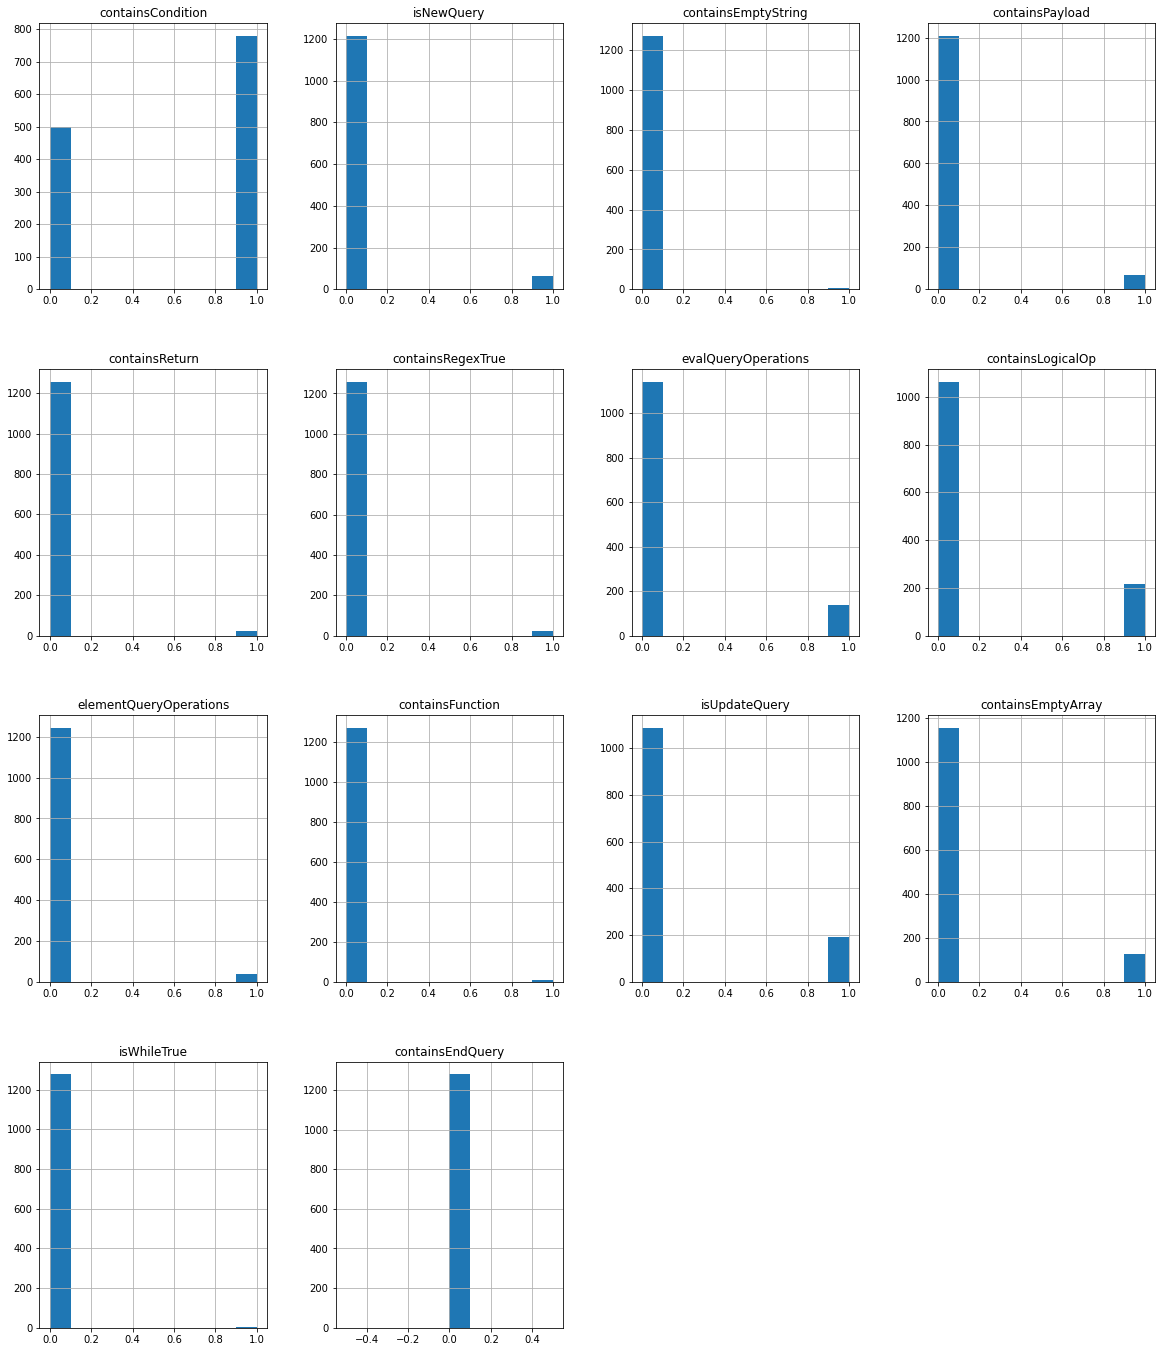

In [ ]:
X.hist( figsize=(20, 24))

In [ ]:
selected_columns=[]
for rownum,(column_name,mean) in  enumerate(feature_df.mean().items()):
    #print(column_name+"-"+str(mean))
    if(mean==0 or mean==1):
      selected_columns.append(column_name)


print(selected_columns)
X = X.drop(selected_columns,axis='columns')
X.head()

['containsEndQuery']


,containsCondition,isNewQuery,containsEmptyString,containsPayload,containsReturn,containsRegexTrue,evalQueryOperations,containsLogicalOp,elementQueryOperations,containsFunction,isUpdateQuery,containsEmptyArray,isWhileTrue
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


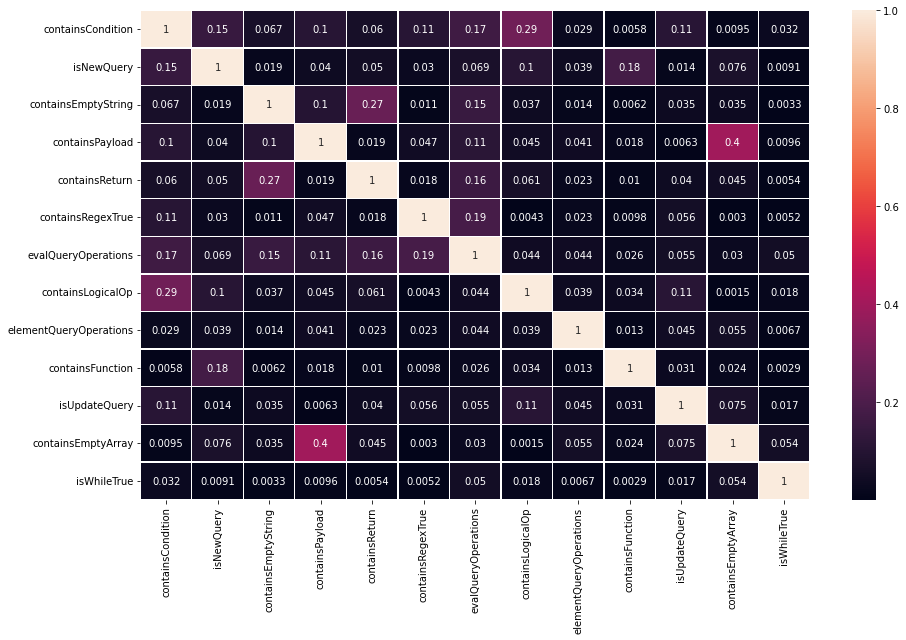

In [ ]:

# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X.corr(method ='pearson').abs()

# plot the absolute values in the heatmap
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr_matrix,annot=True,linewidth=0.3)
plt.show()

** Feature Selection**

In [ ]:
feature_df.info()

In [ ]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 62 )

# Sequential Forward Selection(sfs)
sfs = SFS(AdaBoostClassifier(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = cv_split)

sfs.fit(X, Y)
sfs.k_feature_names_ 

NameError: ignored

In [ ]:
#Sequential backward selection(sbs)
sbs = SFS(AdaBoostClassifier(),
         k_features=11,
         forward=False,
         floating=False,
         scoring = 'accuracy',
         cv=cv_split)


sbs.fit(X.values, Y)

SequentialFeatureSelector(clone_estimator=True,
                          cv=ShuffleSplit(n_splits=10, random_state=62, test_size=0.2, train_size=0.8),
                          estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                       base_estimator=None,
                                                       learning_rate=1.0,
                                                       n_estimators=50,
                                                       random_state=None),
                          floating=False, forward=False, k_features=11,
                          n_jobs=1, pre_dispatch='2*n_jobs', scoring='accuracy',
                          verbose=0)

In [ ]:
sbs_features = []

features = X.columns.to_list()
for feature_num in list(sbs.k_feature_names_):
    #print(features[int(feature_num) ])
    sbs_features.append(features[int(feature_num) ])



sbs_features

NameError: ignored

In [ ]:
sffs = SFS(AdaBoostClassifier(),
         k_features=(11,11),
         forward=True,
         floating=True,
         cv=cv_split)
sffs.fit(X.values, Y)

SequentialFeatureSelector(clone_estimator=True,
                          cv=ShuffleSplit(n_splits=10, random_state=62, test_size=0.2, train_size=0.8),
                          estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                       base_estimator=None,
                                                       learning_rate=1.0,
                                                       n_estimators=50,
                                                       random_state=None),
                          floating=True, forward=True, k_features=(11, 11),
                          n_jobs=1, pre_dispatch='2*n_jobs', scoring=None,
                          verbose=0)

In [ ]:
sffs_features = []

features = X.columns.to_list()
for feature_num in list(sffs.k_feature_names_):
    #print(features[int(feature_num) ])
    sffs_features.append(features[int(feature_num) ])


sffs_features

['Unnamed: 0',
 'containsCondition',
 'isNewQuery',
 'containsEmptyString',
 'containsPayload',
 'containsReturn',
 'containsRegexTrue',
 'evalQueryOperations',
 'containsLogicalOp',
 'containsFunction',
 'containsEmptyArray']

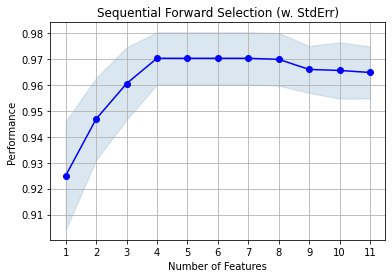

In [ ]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

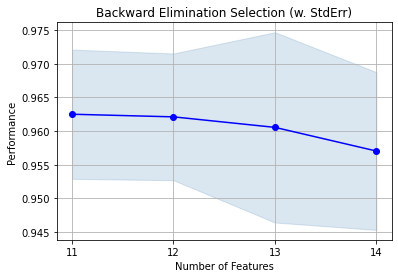

In [ ]:
fig1 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.title('Backward Elimination Selection (w. StdErr)')
plt.grid()
# plt.subplot(1, 3, 1)
plt.show()

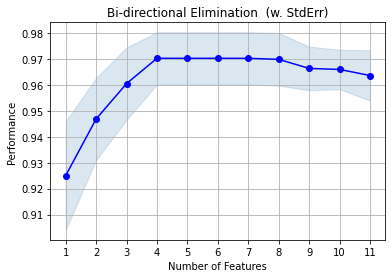

In [ ]:
fig1 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')
plt.title('Bi-directional Elimination  (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
model_params1 = {
    'svm': {
        'model': svm.SVC(gamma='auto',class_weight='balanced'),
        'params' : {
            'C': [1,10,20,30,40,45,50],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'decision_tree': {
        'model': tree.DecisionTreeClassifier(class_weight='balanced'),
        'params' : {
            'criterion':["gini","entropy"],
            'max_depth':[1,2,3,4,5,6,7,None]
        }
    },
    'Adaboost':{
        'model':AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None,class_weight='balanced')),
        'params':{
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'n_estimators': [1, 2]
             }
    },

     'random_forest': {
        'model': RandomForestClassifier(class_weight = 'balanced'),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto',class_weight = 'balanced'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Naive_Bayes:BernoulliNB':{
        'model':BernoulliNB(),
        'params':{
            'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
        }
    },

    # 'XGBoost':{
    #     'model': XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=10) ,
    #     'params':{
    #         'min_child_weight': [1, 5, 10],
    #         'gamma': [0.5, 1, 1.5, 2, 5],
    #         'subsample': [0.6, 0.8, 1.0],
    #         'colsample_bytree': [0.6, 0.8, 1.0],
    #         'max_depth': [3, 4, 5]
    #     }
    # },
    
}

model_params2={
    'XGBoost':{
        'model': XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=10) ,
        'params':{
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
        }
    },
   
}


## GridSearchCV hyperparameter tuning technique (Without Re-sampling technique)

In [ ]:
def plot_loss_curve(clf):
    test_scores = clf.cv_results_['mean_test_score']
    train_scores = clf.cv_results_['mean_train_score'] 
    plt.plot(test_scores, label='test')
    plt.plot(train_scores, label='train')
    plt.legend(loc='best')
    plt.show()


def initGridSearch(x,y,model_params):
    scores = []

    target_names = ['Not Malicious', 'Malicious']
    ConfusionMatrix={}
    reports={}
    for model_name, mp in model_params.items():
        grid =  GridSearchCV( mp['model'],
                             param_grid= mp['params'], 
                             cv=10,  # 10-fold cross validation
                             return_train_score=True,
                             n_jobs=-1)
        clf=grid.fit(x, y)
        # plot the training and validation curve
        plot_loss_curve(clf)
        y_pred=grid.best_estimator_.predict(x)
        print('-------------------------------------------')
        print(model_name.upper())  
        print('-------------------------------------------')
        report=classification_report(y, y_pred, target_names=target_names,output_dict=True)
        
        ConfusionMatrix[model_name]  =  confusion_matrix(y, y_pred)
        reports[model_name] = report

        macro_precision =  report['macro avg']['precision'] 
        macro_recall = report['macro avg']['recall']    
        macro_f1 = report['macro avg']['f1-score']    
        accuracy = report['accuracy']
        print("accuracy: "+str(accuracy)+" precision: "+str(macro_precision)+
              " recall:"+str(macro_recall)+" f1-score:"+str(macro_f1))

        scores.append({
            'model': model_name.upper(),
            'best_score': grid.best_score_,
            'precision':macro_precision,
            'recall':macro_recall,
            'f1_score':macro_f1,
            'best_params': grid.best_params_,
            
        
        })
          
    return scores,reports,ConfusionMatrix

In [ ]:
optimized_features = ['containsCondition','containsEmptyString', 'containsPayload','containsReturn', 'containsRegexTrue', 'evalQueryOperations', 'elementQueryOperations','containsFunction', 'isUpdateQuery', 'isWhileTrue']
# optimized_features = ['containsCondition','containsEmptyString', 'containsNotEqual', 'containsPayload','containsReturn','containsRegexTrue', 'evalQueryOperations','elementQueryOperations', 'containsFunction', 'isUpdateQuery', 'containsEmptyArray','isWhileTrue']
# optimized_features = ['containsCondition','containsEmptyString', 'containsNotEqual', 'containsPayload','containsReturn', 'containsRegexTrue', 'evalQueryOperations','containsFunction','containsEmptyArray','isWhileTrue']

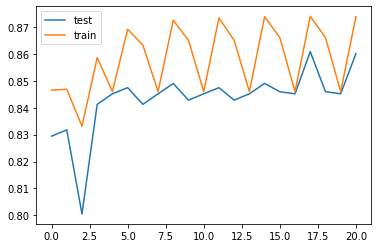

-------------------------------------------
SVM
-------------------------------------------
accuracy: 0.8733385457388585 precision: 0.8322019891981229 recall:0.7520376175548589 f1-score:0.7815749525616698


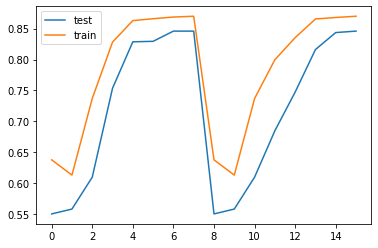

-------------------------------------------
DECISION_TREE
-------------------------------------------
accuracy: 0.8670836591086787 precision: 0.8057139447867925 recall:0.7677153306463651 f1-score:0.7840797146352702


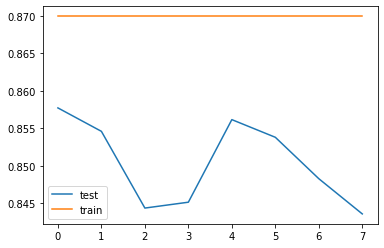

-------------------------------------------
ADABOOST
-------------------------------------------
accuracy: 0.8686473807662236 precision: 0.8084392339359228 recall:0.7701018808777429 f1-score:0.78661995328662


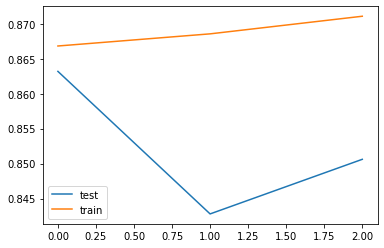

-------------------------------------------
RANDOM_FOREST
-------------------------------------------
accuracy: 0.8639562157935887 precision: 0.7992251384581768 recall:0.7657448872966115 f1-score:0.7803793470966722


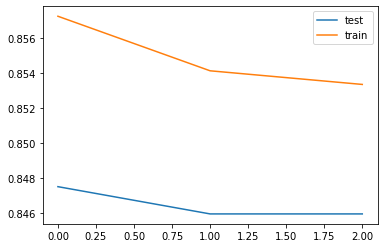

-------------------------------------------
LOGISTIC_REGRESSION
-------------------------------------------
accuracy: 0.8584831899921814 precision: 0.7896036079797658 recall:0.7580926257650396 f1-score:0.7718990202946703


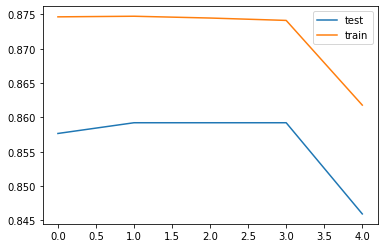

-------------------------------------------
NAIVE_BAYES:BERNOULLINB
-------------------------------------------
accuracy: 0.8749022673964034 precision: 0.8353476177827622 recall:0.7544241677862367 f1-score:0.7842715580855999


In [ ]:
scores,reports,confusion_matrix=initGridSearch(X[optimized_features],Y,model_params1)

In [ ]:
scores,reports,confusion_matrix=initGridSearch(X[optimized_features],Y,model_params1)

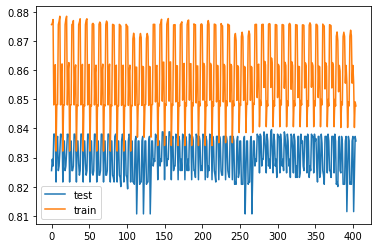

-------------------------------------------
XGBOOST
-------------------------------------------
accuracy: 0.8655199374511336 precision: 0.827907316597928 recall:0.7260915808329602 f1-score:0.7595864661654135


In [ ]:
scores2,reports2,confusion_matrix2=initGridSearch(X[optimized_features],Y,model_params2)

In [ ]:
df33 = pd.DataFrame(scores2,columns=['model','best_score','precision','recall','f1_score','best_params'])
df33

In [ ]:
df3 = pd.DataFrame(scores,columns=['model','best_score','precision','recall','f1_score','best_params'])
df3.to_csv("report2(without_resampling).csv")
df3

## Confusion Matrix of all the Models

In [ ]:
def plot_confusion_matrix(confusion_matrix):

    for model_name,matrix in confusion_matrix.items():
        #print(model_name)
        plt.figure(figsize = (10,7))
        sns.heatmap(matrix, annot=True)
        plt.title(model_name.upper())
        plt.xlabel('Predicted')
        plt.ylabel('Truth')

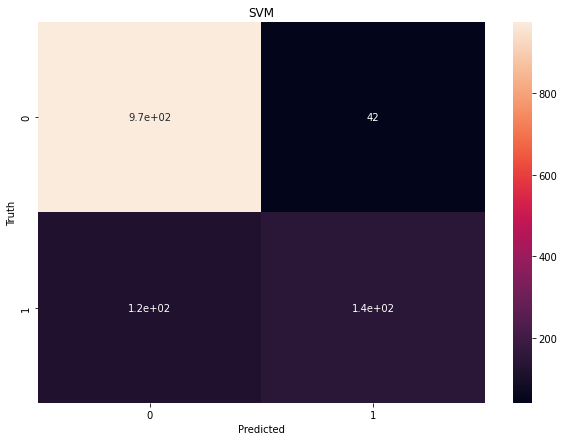

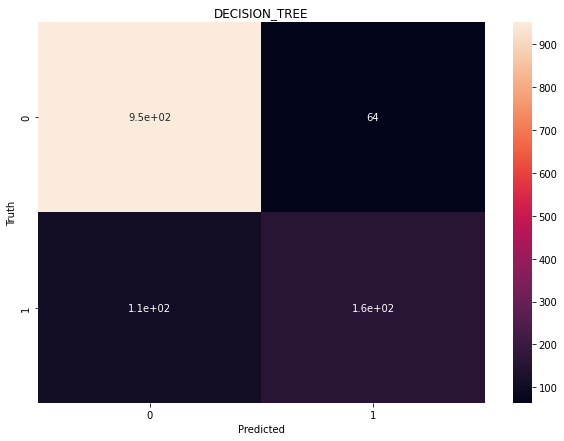

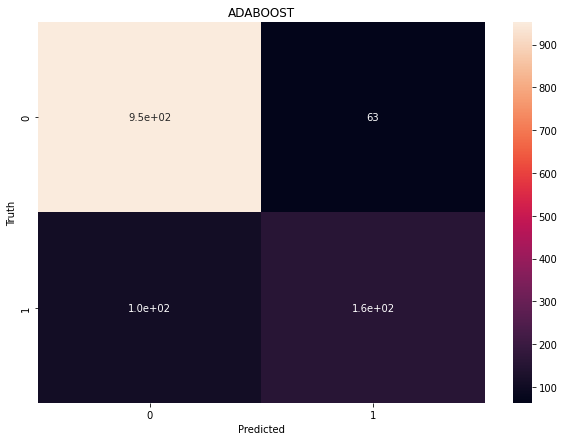

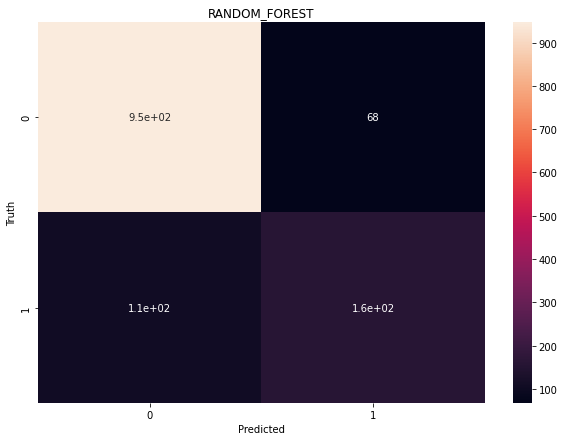

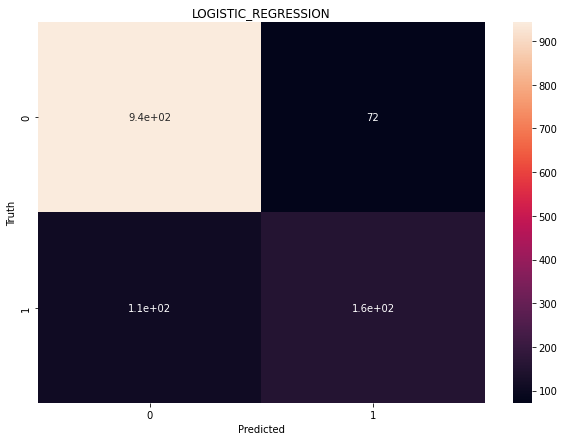

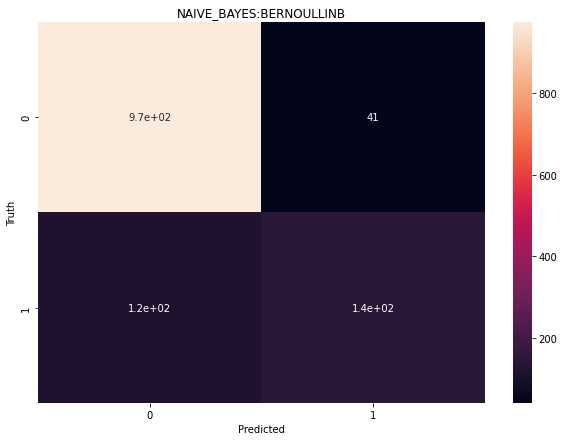

In [ ]:
plot_confusion_matrix(confusion_matrix)

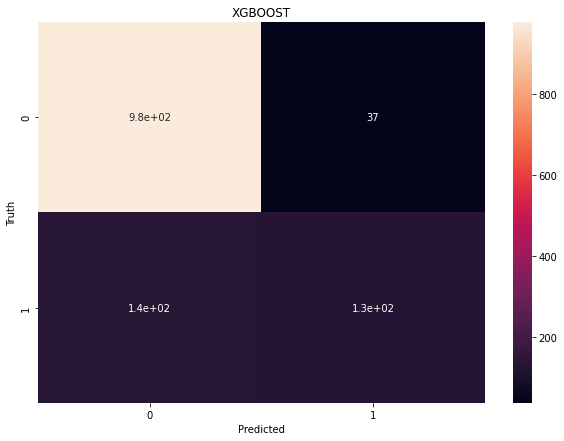

In [ ]:
plot_confusion_matrix(confusion_matrix2)

## GridSearchCV hyperparameter tuning technique (With Re-sampling technique)

In [ ]:
#target_model_name='Adaboost'
#target_sampling_type='SMOTEENN'

###### Object Serialization #######
## method for storing object to the file
def saveModel(model_object,model_name):
    dump(model_object,model_name+'.joblib')

# method for loading the object from the file
def loadModel(model_name):
    model_object= load(model_name)
    return model_object


# method to choose the best performing ML model for storing it to the file
def getBestClassifierObject(model_name,sampling_type,classifierObject):
   
    if(model_name==target_model_name and sampling_type==target_sampling_type):
        #print(classifierObject)
        saveModel(classifierObject,model_name)

In [ ]:
def checkSavedClassifierResults():
    adaboostModel =loadModel(target_model_name+'.joblib')
    result= adaboostModel.best_estimator_.predict([[1,1,0,1,	0,	0,	0,	0,	0,	0]])
    print(result)

#checkSavedClassifierResults()

In [ ]:
def transform(transformer,x,y):
    print("Transforming {}".format(transformer.__class__.__name__))
    X_resampled,Y_resampled = transformer.fit_sample(x.values,y.values.ravel())
    return transformer.__class__.__name__,pd.DataFrame(X_resampled), pd.DataFrame(Y_resampled)


def launch_Grid_Search_Resampling(sampling_type,x,y,model_params):
    scores = []
    target_names = ['Not Malicious', 'Malicious']
    ConfusionMatrix={}

    for model_name, mp in model_params.items():
        grid =  GridSearchCV(estimator=mp['model'],param_grid= mp['params'],scoring='accuracy', 
                             cv=10,n_jobs=-1,verbose=2, return_train_score=True)
        clf = grid.fit(x, y)
        plot_loss_curve(clf)
        #getBestClassifierObject(model_name,sampling_type,grid)

        y_pred=grid.best_estimator_.predict(x)
        print('-------------------------------------------')
        print(model_name.upper())  
        print('-------------------------------------------')
        report=classification_report(y, y_pred, target_names=target_names,output_dict=True)
        print(report)
        ConfusionMatrix[model_name]  =  confusion_matrix(y, y_pred)
        
        macro_precision =  report['macro avg']['precision'] 
        macro_recall = report['macro avg']['recall']    
        macro_f1 = report['macro avg']['f1-score']    
        accuracy = report['accuracy']

        scores.append({
            'sampling_type':sampling_type,
            'model': model_name.upper(),
            'best_score': grid.best_score_,
            'precision':macro_precision,
            'recall':macro_recall,
            'f1_score':macro_f1,
            'best_params': grid.best_params_,    
        })      
    return scores


In [ ]:
optimized_X=X[optimized_features]

datasets = []

datasets.append(transform(SMOTE(n_jobs=-1),optimized_X,Y))
datasets.append(transform(RandomOverSampler(),optimized_X,Y))
datasets.append(transform(NearMiss(n_jobs=-1),optimized_X,Y))
datasets.append(transform(RandomUnderSampler(),optimized_X,Y))
datasets.append(transform(SMOTEENN(),optimized_X,Y))
datasets.append(transform(SMOTETomek(),optimized_X,Y))

In [ ]:
# benchmark_scores11 = []
# for sample_type,x,y in datasets:
#     print('______________________________________________________________')
#     print('{}'.format(sample_type))
#     benchmark_scores11 = benchmark_scores11 + (launch_Grid_Search_Resampling(sample_type,x,y,model_params1))
#     print('______________________________________________________________')

______________________________________________________________
SMOTEENN
Fitting 10 folds for each of 21 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    1.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


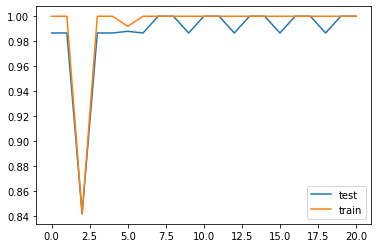

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------------------------------------
SVM
-------------------------------------------
{'Not Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 562}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 265}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 827}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 827}}
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.8s finished


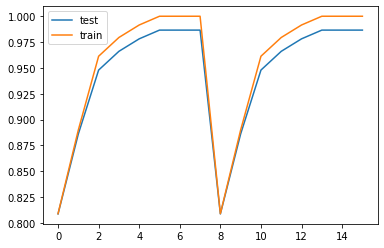

-------------------------------------------
DECISION_TREE
-------------------------------------------
{'Not Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 562}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 265}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 827}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 827}}
Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


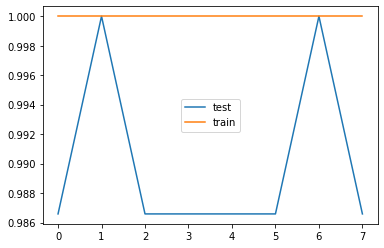

-------------------------------------------
ADABOOST
-------------------------------------------
{'Not Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 562}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 265}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 827}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 827}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


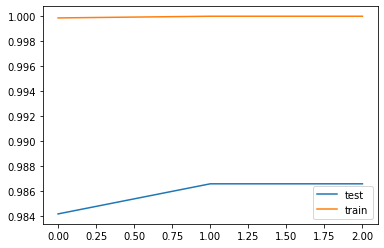

-------------------------------------------
RANDOM_FOREST
-------------------------------------------
{'Not Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 562}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 265}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 827}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 827}}
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


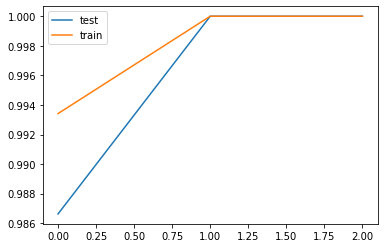

-------------------------------------------
LOGISTIC_REGRESSION
-------------------------------------------
{'Not Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 562}, 'Malicious': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 265}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 827}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 827}}
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


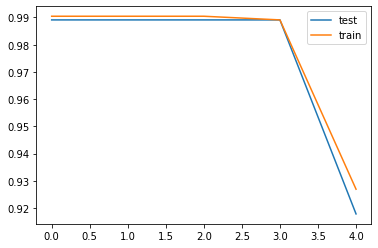

-------------------------------------------
NAIVE_BAYES:BERNOULLINB
-------------------------------------------
{'Not Malicious': {'precision': 0.9825174825174825, 'recall': 1.0, 'f1-score': 0.9911816578483245, 'support': 562}, 'Malicious': {'precision': 1.0, 'recall': 0.9622641509433962, 'f1-score': 0.9807692307692307, 'support': 265}, 'accuracy': 0.9879081015719468, 'macro avg': {'precision': 0.9912587412587412, 'recall': 0.9811320754716981, 'f1-score': 0.9859754443087776, 'support': 827}, 'weighted avg': {'precision': 0.988119498397612, 'recall': 0.9879081015719468, 'f1-score': 0.9878451485666317, 'support': 827}}
______________________________________________________________


In [ ]:
benchmark_scores1 = []
for sample_type,x,y in datasets:
    print('______________________________________________________________')
    print('{}'.format(sample_type))
    benchmark_scores1 = benchmark_scores1 + (launch_Grid_Search_Resampling(sample_type,x,y,model_params1))
    print('______________________________________________________________')

In [ ]:
# dataset = []

# dataset.append(transform(SMOTETomek(),optimized_X,Y))

# benchmark_scores2 = []
# for sample_type,x,y in datasets:
#     print('______________________________________________________________')
#     print('{}'.format(sample_type))
#     benchmark_scores2 = benchmark_scores2 + (launch_Grid_Search_Resampling(sample_type,x,y,model_params2))
#     print('______________________________________________________________')

In [ ]:
# benchmark_scores2nd = []
# for sample_type,x,y in datasets:
#     print('______________________________________________________________')
#     print('{}'.format(sample_type))
#     benchmark_scores2nd = benchmark_scores2nd + (launch_Grid_Search_Resampling(sample_type,x,y,model_params1))
#     print('______________________________________________________________')

# print(benchmark_scores2nd)
# sampling_results = pd.DataFrame(benchmark_scores2nd,columns=['sampling_type','model','best_score','precision','recall','f1_score','best_params'])
# sampling_results.to_csv("report1(with_resampling2).csv")
# sampling_results

In [ ]:
print(benchmark_scores2)
sampling_results = pd.DataFrame(benchmark_scores2,columns=['sampling_type','model','best_score','precision','recall','f1_score','best_params'])
sampling_results.to_csv("report1(with_resamplingxg).csv")
sampling_results

In [ ]:
print(benchmark_scores1)
sampling_results = pd.DataFrame(benchmark_scores1,columns=['sampling_type','model','best_score','precision','recall','f1_score','best_params'])
sampling_results.to_csv("report1(with_resampling).csv")
sampling_results